<a href="https://colab.research.google.com/github/pershikova/Optics-project-2024/blob/main/SOAP_Interference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

In [12]:
# Параметры пленки и капиллярных волн
n = 1.33  # Оптический индекс мыльного раствора
incident_angle = np.pi / 2   # Угол падения света (в радианах)
R = 0.639  # Коэффициент отражения на границе воздух-жидкость

# Параметры волны
A0 = 1e-6  # Амплитуда волны в метрах
radius = 0.01  # Радиус трубки в метрах

# Спектральное распределение интенсивности естественного света (волны в диапазоне от 400 нм до 700 нм)
wavelengths = np.linspace(400e-9, 700e-9, 500)[:, np.newaxis]

In [5]:
# Частоты для сравнения
frequencies = np.arange(0, 2500, 250)
num_rows = len(frequencies) // 5  # Количество полных строк
if len(frequencies) % 5 > 0:  # Если остались частоты
    num_rows += 1  # Добавляем еще одну строку для оставшихся частот

# Создание случайного распределения интенсивности для каждой частоты
intensities_by_frequency = np.random.rand(len(frequencies), len(wavelengths))

In [6]:
# Функция для расчета положения капиллярных волн
def capillary_wave_position(r, theta, t, A0, frequency, wavelength, g = 9.8):
    vertical_displacement = 1 - 0.5 * g * t**2  # Учет вертикальной компоненты движения под воздействием гравитации
    return A0 * np.cos(2 * np.pi * r / wavelength) * np.cos(2 * np.pi * frequency * t) * np.cos(theta) + vertical_displacement

In [7]:
# Функция для расчета интерференционной картины
def interference_pattern(thickness, wavelength, n, intensity):
    delta = 4 * np.pi * n * thickness / wavelength
    I = 1 + R**2 + 2 * R * np.cos(delta)
    return I * intensity

In [8]:
# Функция для преобразования интенсивности в цвет
def intensity_to_rgb(I):
    hue = (I - I.min()) / (I.max() - I.min())  # Преобразование интенсивности в оттенок цвета (от 0 до 1)
    saturation = np.ones_like(hue)  # Насыщенность цвета (всегда 1)
    value = np.ones_like(hue)  # Яркость цвета (всегда 1)
    hsv = np.stack((hue, saturation, value), axis = -1)  # Формирование массива HSV
    return hsv_to_rgb(hsv)  # Преобразование из HSV в RGB

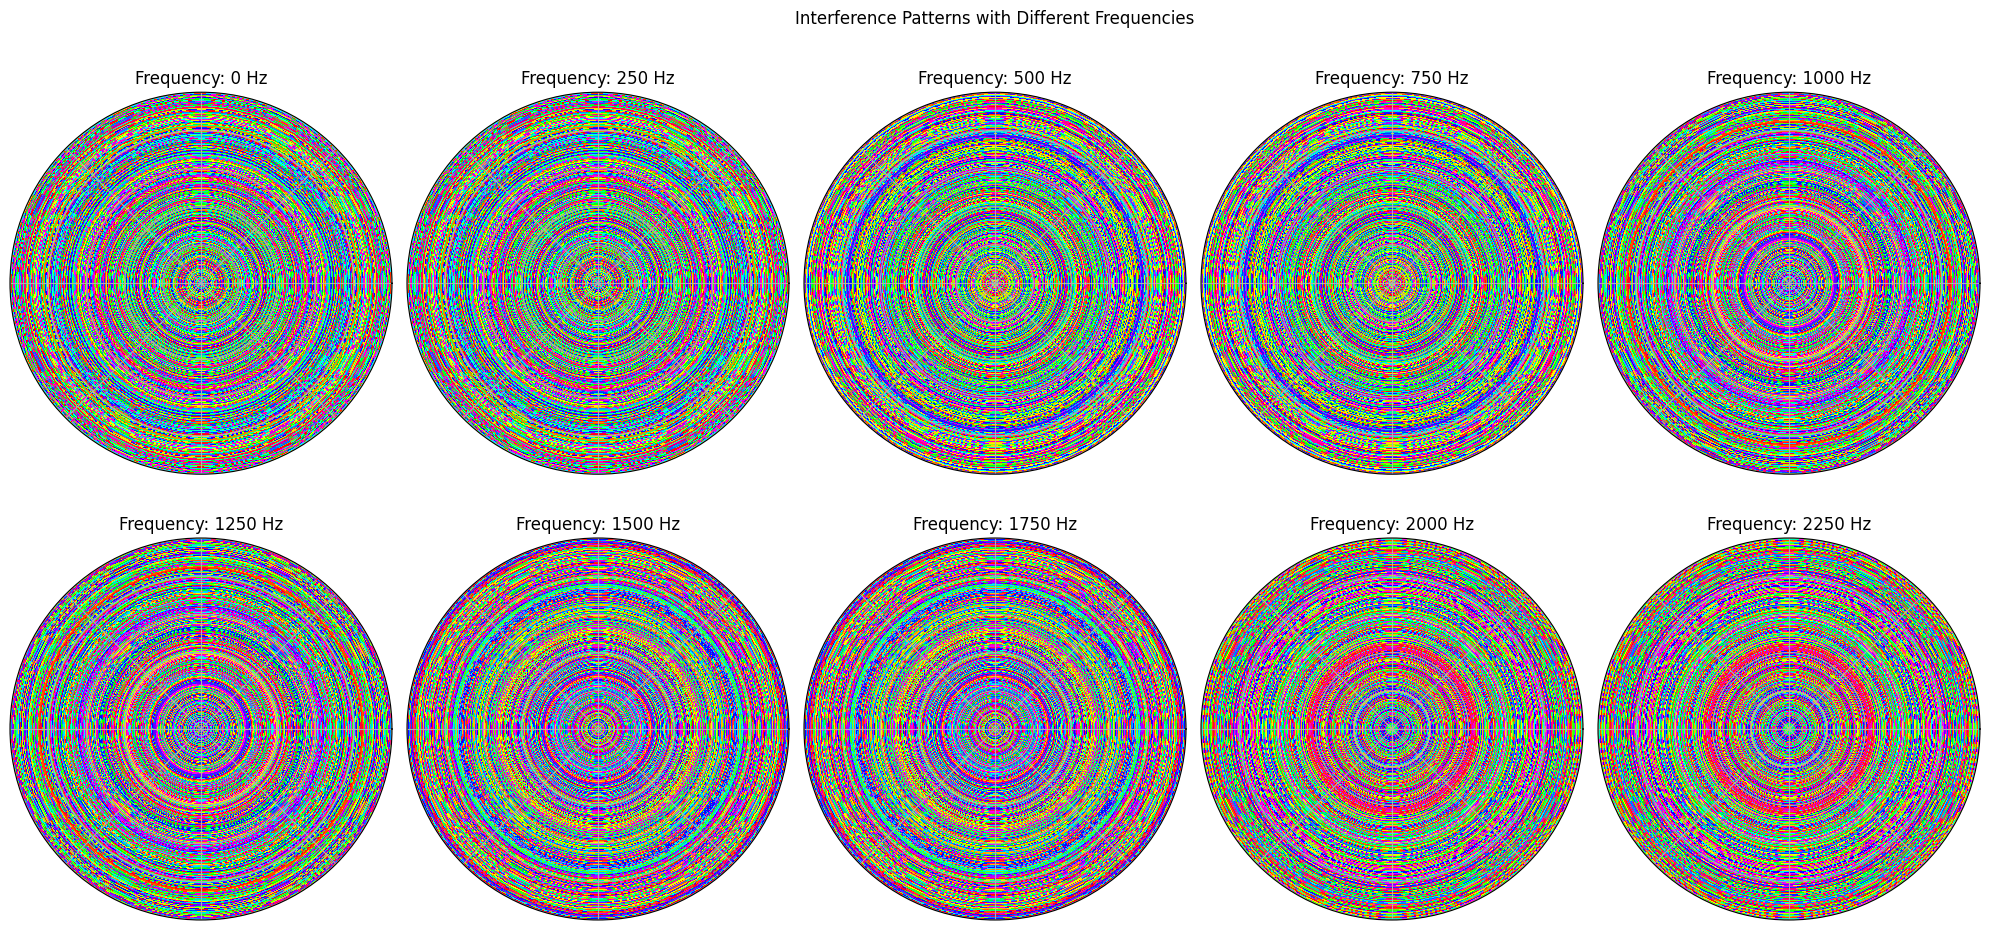

In [13]:
# Создание сетки для визуализации
theta = np.linspace(0, 2 * np.pi, 500)
r = np.linspace(0, radius, 500)
R, Theta = np.meshgrid(r, theta)

# Визуализация интерференционных картин для разных частот
fig, axs = plt.subplots(num_rows, 5, subplot_kw={'projection': 'polar'}, figsize =(20, num_rows * 5))
axs = axs.flatten()  # Преобразование массива осей в одномерный массив
for ax, frequency in zip(axs, frequencies):
    # Расчет положения капиллярной волны
    t = 0  # Фиксируем момент времени для простоты
    Z = capillary_wave_position(R, Theta, t, A0, frequency, wavelengths)

    # Учет силы тяжести
    thickness = Z + radius

    # Расчет интерференционной картины с использованием интенсивности для текущей частоты
    I = interference_pattern(thickness, wavelengths, n, intensities_by_frequency[frequency // 500 - 1])

    # Преобразование интенсивности в цветовую карту
    RGB = intensity_to_rgb(I)

    # Визуализация интерференционной картины
    ax.pcolormesh(Theta, R, RGB, shading='auto')  # Построение тепловой карты
    ax.set_yticklabels([])  # Удаление меток на радиальных осях
    ax.set_xticklabels([])  # Удаление меток на азимутальных осях
    ax.set_title(f'Frequency: {frequency} Hz')  # Заголовок с частотой волны

# Убедимся, что все пустые оси скрыты
for ax in axs[len(frequencies):]:
    ax.axis('off')

plt.suptitle('Interference Patterns with Different Frequencies')  # Общий заголовок для всех графиков
plt.tight_layout()  # Корректировка размещения графиков
plt.show()  # Отображение графиков